In [1]:
import warnings
import pandas as pd
from pandas import read_excel
from pandas import DataFrame
from pandas import Grouper
import numpy as np
from scipy.stats import boxcox
from matplotlib import pyplot
from pandas import concat
from matplotlib import pyplot
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
from google.colab import files
# plt.style.use('fivethirtyeight')



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


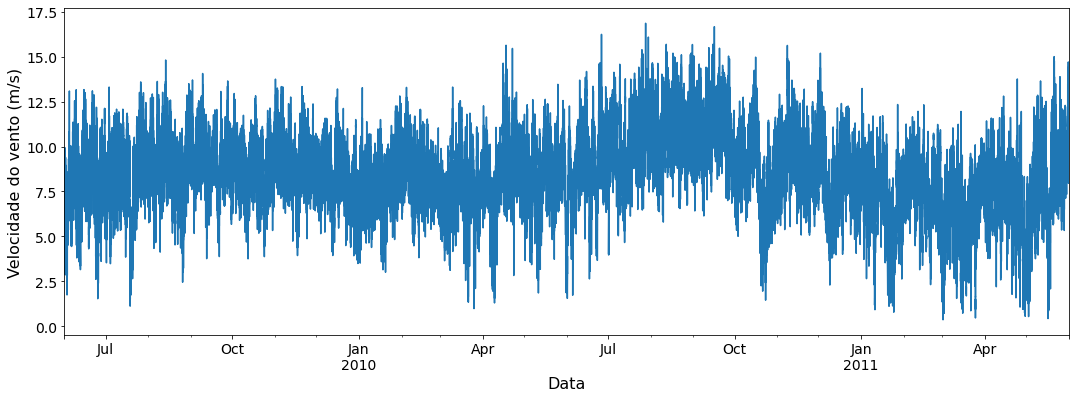

In [2]:
# OPEN WIND SPEED TIME SERIES
series_ws = read_excel('wind_speed_main_db.xlsx', header=0, index_col=0, parse_dates=True, squeeze=True)


# Plot 2009-2010 and 2010-2011 wind speed time series
fig = plt.figure()
series_ws.plot(figsize=(18, 6))

plt.xlabel("Data", fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Velocidade do vento (m/s)", fontsize=16)
plt.yticks(fontsize=14)
plt.show()

fig.savefig('velocidade_do_vento.eps', format='eps', dpi=1000)
# fig.savefig('velocidade_do_vento.svg', format='svg', dpi=1200)


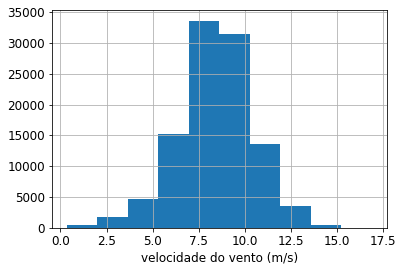

In [ ]:
# Histogram of 2009-2011
fig2 = plt.figure()
series_ws.hist()
plt.xlabel("velocidade do vento (m/s)", fontsize=12)
# plt.ylabel("Frequência", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
pyplot.show()

fig2.savefig('histograma_do_vento.eps', format='eps', dpi=1000)
# fig2.savefig('histograma_do_vento2.eps', format='eps', dpi=1000)

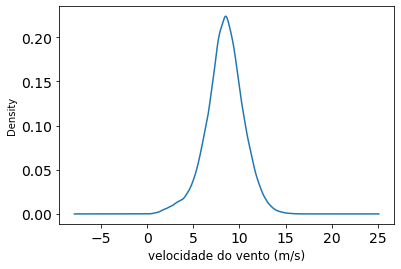

In [ ]:
# Density curve 2009-2011
fig3 = plt.figure()
series_ws.plot(kind='kde')
plt.xlabel("velocidade do vento (m/s)", fontsize=12)
#plt.ylabel("Densidade", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
pyplot.show()

fig3.savefig('densidade_do_vento.eps', format='eps', dpi=1000)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


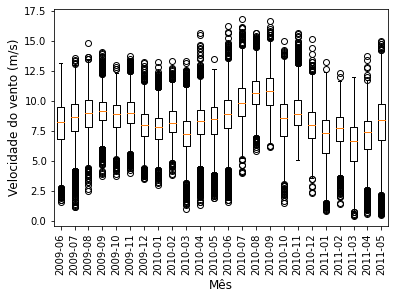

In [3]:
# BOX and WHISKER PLOTS
# 2009-06
y_2009_06 = series_ws['2009-06']

# 2009-07
y_2009_07 = series_ws['2009-07']

# 2009-08
y_2009_08 = series_ws['2009-08']

# 2009-09
y_2009_09 = series_ws['2009-09']

# 2009-10
y_2009_10 = series_ws['2009-10']

# 2009-11
y_2009_11 = series_ws['2009-11']

# 2009-12
y_2009_12 = series_ws['2009-12']

# 2010-01
y_2010_01 = series_ws['2010-01']

# 2010-02
series_ws['2010-02'] = series_ws['2010-02'].interpolate()
y_2010_02 = series_ws['2010-02']

# 2010-03
y_2010_03 = series_ws['2010-03']

# 2010-04
y_2010_04 = series_ws['2010-04']

# 2010-05
y_2010_05 = series_ws['2010-05']

# 2010-06
y_2010_06 = series_ws['2010-06']

# 2010-07
y_2010_07 = series_ws['2010-07']

# 2010-08
y_2010_08 = series_ws['2010-08']

# 2010-09
y_2010_09 = series_ws['2010-09']

# 2010-10
y_2010_10 = series_ws['2010-10']

# 2010-11
y_2010_11 = series_ws['2010-11']

# 2010-12
y_2010_12 = series_ws['2010-12']

# 2011-01
y_2011_01 = series_ws['2011-01']

# 2011-02
y_2011_02 = series_ws['2011-02']

# 2011-03
y_2011_03 = series_ws['2011-03']

# 2011-04
y_2011_04 = series_ws['2011-04']

# 2011-05
y_2011_05 = series_ws['2011-05']




my_dict = {'2009-06': y_2009_06,'2009-07': y_2009_07, '2009-08': y_2009_08, '2009-09': y_2009_09, '2009-10': y_2009_10, '2009-11': y_2009_11, '2009-12': y_2009_12,\
           '2010-01': y_2010_01, '2010-02': y_2010_02, '2010-03': y_2010_03, '2010-04': y_2010_04, '2010-05': y_2010_05, '2010-06': y_2010_06, '2010-07': y_2010_07, '2010-08': y_2010_08, '2010-09': y_2010_09, '2010-10': y_2010_10, '2010-11': y_2010_11, '2010-12': y_2010_12, \
           '2011-01': y_2011_01, '2011-02': y_2011_02, '2011-03': y_2011_03, '2011-04': y_2011_04, '2011-05': y_2011_05}

fig4, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys(), fontsize = 10)
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Velocidade do vento (m/s)", fontsize=12)
plt.xticks(rotation=90)
fig4.savefig('boxplot_vento.eps', format='eps', dpi=1000)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


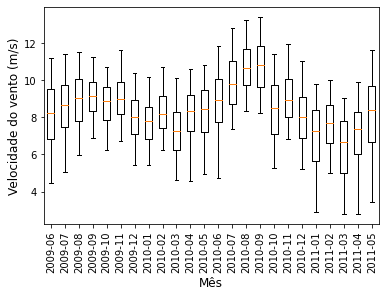

In [ ]:
# 2009-06
lower = series_ws['2009-06'].quantile(.05)
upper = series_ws['2009-06'].quantile(.95)
y_2009_06 = series_ws['2009-06'].clip(lower=lower, upper=upper)

# 2009-07
lower = series_ws['2009-07'].quantile(.05)
upper = series_ws['2009-07'].quantile(.95)
y_2009_07 = series_ws['2009-07'].clip(lower=lower, upper=upper)

# 2009-08
lower = series_ws['2009-08'].quantile(.05)
upper = series_ws['2009-08'].quantile(.95)
y_2009_08 = series_ws['2009-08'].clip(lower=lower, upper=upper)

# 2009-09
lower = series_ws['2009-09'].quantile(.05)
upper = series_ws['2009-09'].quantile(.95)
y_2009_09 = series_ws['2009-09'].clip(lower=lower, upper=upper)

# 2009-10
lower = series_ws['2009-10'].quantile(.05)
upper = series_ws['2009-10'].quantile(.95)
y_2009_10 = series_ws['2009-10'].clip(lower=lower, upper=upper)

# 2009-11
lower = series_ws['2009-11'].quantile(.05)
upper = series_ws['2009-11'].quantile(.95)
y_2009_11 = series_ws['2009-11'].clip(lower=lower, upper=upper)

# 2009-12
lower = series_ws['2009-12'].quantile(.05)
upper = series_ws['2009-12'].quantile(.95)
y_2009_12 = series_ws['2009-12'].clip(lower=lower, upper=upper)

# 2010-01
lower = series_ws['2010-01'].quantile(.05)
upper = series_ws['2010-01'].quantile(.95)
y_2010_01 = series_ws['2010-01'].clip(lower=lower, upper=upper)

# 2010-02
series_ws['2010-02'] = series_ws['2010-02'].interpolate()
# series_ws['2010-02'] = series_ws['2010-02'].fillna(0)
lower = series_ws['2010-02'].quantile(.05)
upper = series_ws['2010-02'].quantile(.95)
y_2010_02 = series_ws['2010-02'].clip(lower=lower, upper=upper)

# 2010-03
lower = series_ws['2010-03'].quantile(.05)
upper = series_ws['2010-03'].quantile(.95)
y_2010_03 = series_ws['2010-03'].clip(lower=lower, upper=upper)

# 2010-04
lower = series_ws['2010-04'].quantile(.05)
upper = series_ws['2010-04'].quantile(.95)
y_2010_04 = series_ws['2010-04'].clip(lower=lower, upper=upper)

# 2010-05
lower = series_ws['2010-05'].quantile(.05)
upper = series_ws['2010-05'].quantile(.95)
y_2010_05 = series_ws['2010-05'].clip(lower=lower, upper=upper)

# 2010-06
lower = series_ws['2010-06'].quantile(.05)
upper = series_ws['2010-06'].quantile(.95)
y_2010_06 = series_ws['2010-06'].clip(lower=lower, upper=upper)

# 2010-07
lower = series_ws['2010-07'].quantile(.05)
upper = series_ws['2010-07'].quantile(.95)
y_2010_07 = series_ws['2010-07'].clip(lower=lower, upper=upper)

# 2010-08
lower = series_ws['2010-08'].quantile(.05)
upper = series_ws['2010-08'].quantile(.95)
y_2010_08 = series_ws['2010-08'].clip(lower=lower, upper=upper)

# 2010-09
lower = series_ws['2010-09'].quantile(.05)
upper = series_ws['2010-09'].quantile(.95)
y_2010_09 = series_ws['2010-09'].clip(lower=lower, upper=upper)

# 2010-10
lower = series_ws['2010-10'].quantile(.05)
upper = series_ws['2010-10'].quantile(.95)
y_2010_10 = series_ws['2010-10'].clip(lower=lower, upper=upper)

# 2010-11
lower = series_ws['2010-11'].quantile(.05)
upper = series_ws['2010-11'].quantile(.95)
y_2010_11 = series_ws['2010-11'].clip(lower=lower, upper=upper)

# 2010-12
lower = series_ws['2010-12'].quantile(.05)
upper = series_ws['2010-12'].quantile(.95)
y_2010_12 = series_ws['2010-12'].clip(lower=lower, upper=upper)

# 2011-01
lower = series_ws['2011-01'].quantile(.05)
upper = series_ws['2011-01'].quantile(.95)
y_2011_01 = series_ws['2011-01'].clip(lower=lower, upper=upper)

# 2011-02
lower = series_ws['2011-02'].quantile(.05)
upper = series_ws['2011-02'].quantile(.95)
y_2011_02 = series_ws['2011-02'].clip(lower=lower, upper=upper)

# 2011-03
lower = series_ws['2011-03'].quantile(.05)
upper = series_ws['2011-03'].quantile(.95)
y_2011_03 = series_ws['2011-03'].clip(lower=lower, upper=upper)

# 2011-04
lower = series_ws['2011-04'].quantile(.05)
upper = series_ws['2011-04'].quantile(.95)
y_2011_04 = series_ws['2011-04'].clip(lower=lower, upper=upper)

# 2011-05
lower = series_ws['2011-05'].quantile(.05)
upper = series_ws['2011-05'].quantile(.95)
y_2011_05 = series_ws['2011-05'].clip(lower=lower, upper=upper)




my_dict = {'2009-06': y_2009_06,'2009-07': y_2009_07, '2009-08': y_2009_08, '2009-09': y_2009_09, '2009-10': y_2009_10, '2009-11': y_2009_11, '2009-12': y_2009_12,\
           '2010-01': y_2010_01, '2010-02': y_2010_02, '2010-03': y_2010_03, '2010-04': y_2010_04, '2010-05': y_2010_05, '2010-06': y_2010_06, '2010-07': y_2010_07, '2010-08': y_2010_08, '2010-09': y_2010_09, '2010-10': y_2010_10, '2010-11': y_2010_11, '2010-12': y_2010_12, \
           '2011-01': y_2011_01, '2011-02': y_2011_02, '2011-03': y_2011_03, '2011-04': y_2011_04, '2011-05': y_2011_05}

fig5, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys(), fontsize = 10)
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Velocidade do vento (m/s)", fontsize=12)
plt.xticks(rotation=90)
fig5.savefig('boxplot_vento2.eps', format='eps', dpi=1000)

In [ ]:
df = pd.concat([y_2009_07, y_2009_08, y_2009_09, y_2009_10, y_2009_11, y_2009_12, \
                y_2010_01, y_2010_02, y_2010_03, y_2010_04, y_2010_05, y_2010_06, y_2010_07, y_2010_08, y_2010_09, y_2010_10, y_2010_11, y_2010_12,\
                y_2011_01, y_2011_02,y_2011_03,y_2011_04,y_2011_05], axis=0)
df.count()

100800

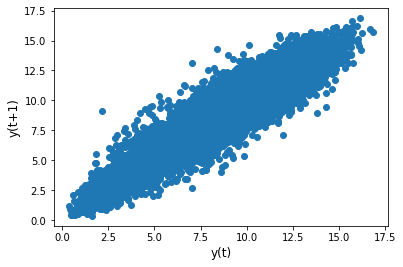

In [ ]:
# LAG SCATTER PLOT
fig6 = plt.figure()

lag_plot(series_ws)
plt.xlabel("y(t)", fontsize=12)
plt.ylabel("y(t+1)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

pyplot.show()
fig6.savefig('lag_scatter.eps', format='eps', dpi=1000)

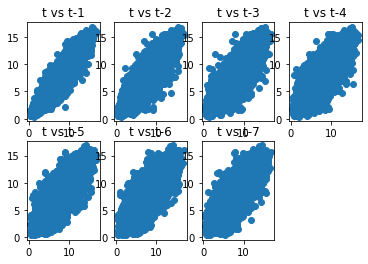

In [ ]:
# MULTIPLE LAG SCATTER PLOT
fig7 = plt.figure()

values = DataFrame(series_ws.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
  columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
  columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
  ax = pyplot.subplot(240 + i)
  ax.set_title('t vs t-' + str(i))
  pyplot.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)


pyplot.show()

fig7.savefig('mult_lag_scatter.eps', format='eps')

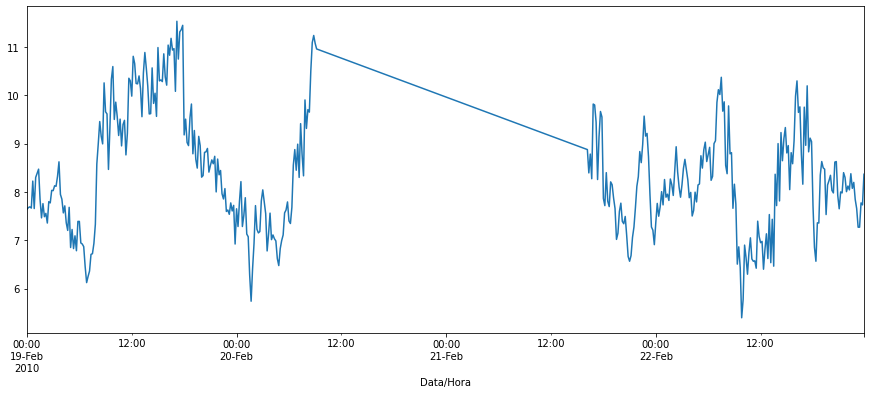

In [4]:
# Plot FROM 2010-02-19 TO 2010-02-22 wind speed data (NaN values)
series_ws['2010-02-19':'2010-02-22'].plot(figsize=(15, 6))

pyplot.show()

In [ ]:
# INTERPOLATE NaN VALUES (FROM 2010-02-19 TO 2010-02-22)
series_ws = series_ws.interpolate()
series_ws.count() # before interpolate = 104934, after interpolate = 105119

105119

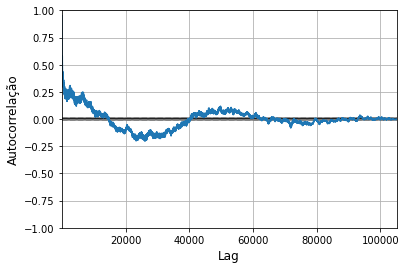

In [6]:
# AUTOCORRELATION PLOT
fig8 = plt.figure()

series_ws2 = series_ws.dropna() # importante para funcionar a função de Autocorrelação e Seasonal_decompose
autocorrelation_plot(series_ws2)
plt.xlabel("Lag", fontsize=12)
plt.ylabel("Autocorrelação", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

pyplot.show()

fig8.savefig('autocorrelacao.eps', format='eps', dpi=1000)

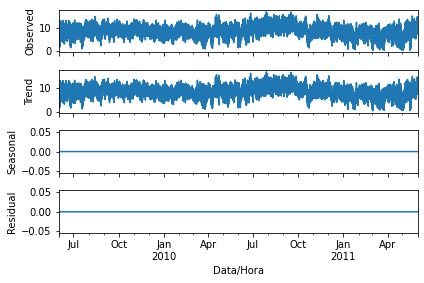

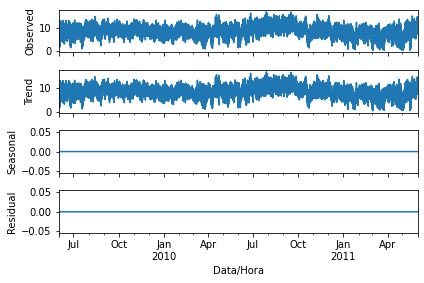

In [ ]:
# SEASONAL DECOMPOSE FUNCTION
# A função seasonal_decompose não funciona com dados iguais a 0 ou negativos (existe NaN na base de dados)
result = seasonal_decompose(series_ws2, model='additive', freq=1)
result.plot()
# pyplot.show()

result.plot().savefig('seasonal_decompose.eps',format='eps', dpi=1000)


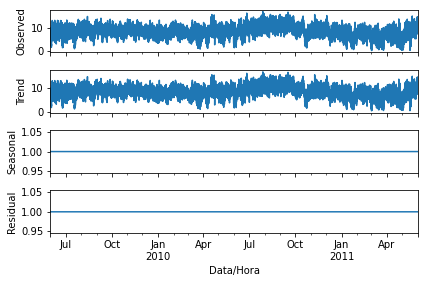

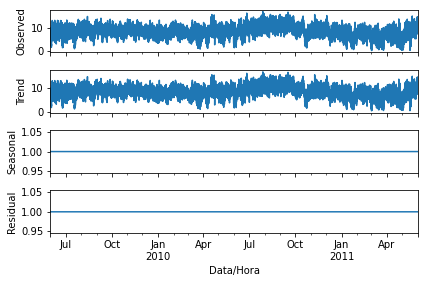

In [ ]:
result = seasonal_decompose(series_ws2, model='multiplicative', freq=1)
result.plot()


In [7]:
# Verificando Estacionaridade dos dados de forma rápida (com mais de 1 média e variância)
X = series_ws2.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=8.340050, mean2=8.476906
variance1=2.875972, variance2=5.427767


In [10]:
# Calculate stationarity test of time series data
from statsmodels.tsa.stattools import adfuller
y = series_ws.resample('D').mean()

X = y
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.726528
p-value: 0.069559
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [ ]:
import warnings
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [9]:
# The 'D' string groups the data in buckets by start of the DAY
y = series_ws2.resample('D').mean()
# y2 = df.resample('D').mean()


# The term bfill means that we use the value before filling in missing values
# y = y.fillna(y.bfill())

print(y)

Data/Hora
2009-06-01     6.831001
2009-06-02     5.239543
2009-06-03     6.001895
2009-06-04     8.466946
2009-06-05     7.542451
                ...    
2011-05-27     9.337519
2011-05-28     9.423449
2011-05-29     9.421524
2011-05-30     9.520388
2011-05-31    11.317752
Freq: D, Name: Vmed(80m), Length: 730, dtype: float64


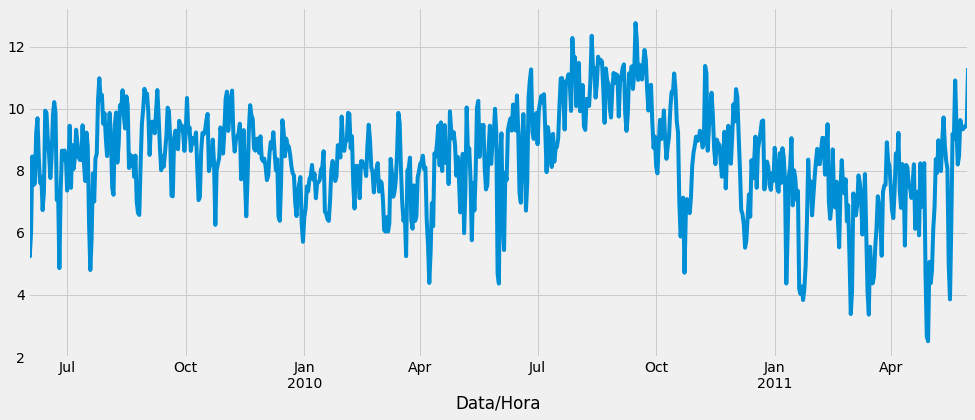

In [ ]:
y.plot(figsize=(15, 6))
# y2.plot(figsize=(15, 6))
plt.show()

In [14]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
y.index[:511]

In [15]:
# ANALYSIS TO VERIFY THE BEST PARAMETERS FOR ARIMA (RAW DATA)
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,# y[:511]
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:5201.758577274147
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4430.369134246288
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2937.546003095734
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2579.115812480086
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2936.472724944962
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2632.347610523821
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2668.516981539665
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2576.647881033435
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4283.4011453167495
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3655.067833229568
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2571.6244426153116
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2189.65210309113
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2576.541600902909
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2238.910124523022
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2307.920035818276
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2193.925430209504
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2133.2079808486806
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2091.921279242727
ARIMA(0,

In [11]:
# TRAINING ARIMA (WITH RAW DATA)
mod = sm.tsa.statespace.SARIMAX(y, # y[:511]
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)


results = mod.fit()



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6643      0.035     19.025      0.000       0.596       0.733
ma.L1         -0.9513      0.018    -53.519      0.000      -0.986      -0.916
ma.S.L12      -1.0214      0.029    -34.985      0.000      -1.079      -0.964
sigma2         0.9130      0.053     17.386      0.000       0.810       1.016


In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          Vmed(80m)   No. Observations:                  730
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -995.745
Date:                            Tue, 26 Apr 2022   AIC                           1999.490
Time:                                    17:53:31   BIC                           2017.711
Sample:                                06-01-2009   HQIC                          2006.532
                                     - 05-31-2011                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6643      0.035     19.025      0.000       0.596       0.733
ma.L1         -0.9513      0.018    -53.519      0.000      -0.986      -0.916
ma.S.L12      -1.0214      0.029    -34.985      0.000      -1.079      -0.964
sigma2         0.9130      0.053     17.386      0.000       0.810       1.016
===================================================================================
Ljung-Box (Q):                       72.11   Jarque-Bera (JB):                35.33
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.76   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


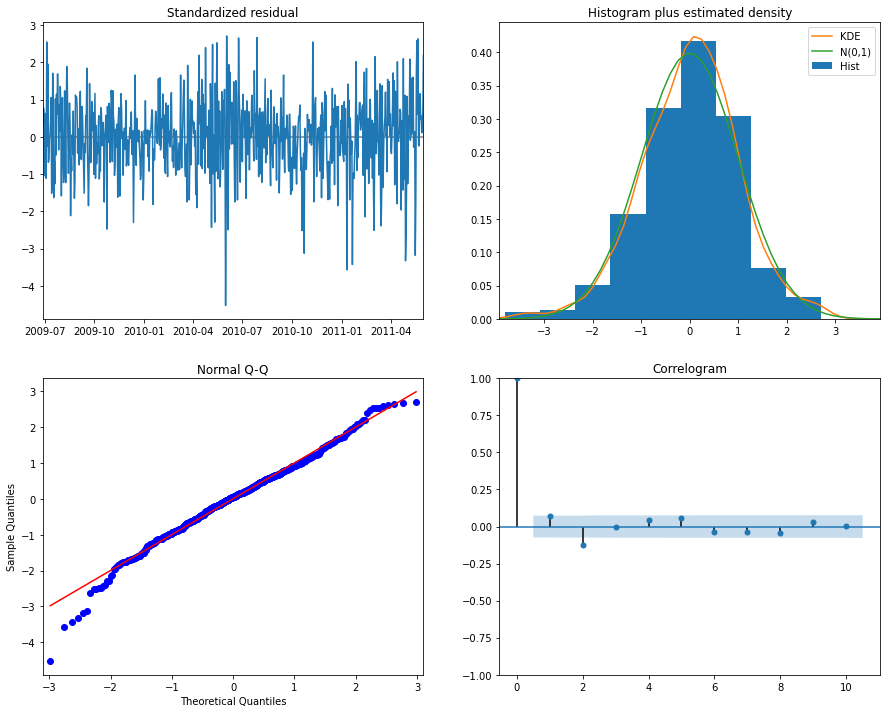

In [27]:
# DIAGNOSTICS GRAPHICS
results.plot_diagnostics(figsize=(15, 12))
plt.savefig('diagnostico_sarimax.eps', format='eps', dpi=1200)
plt.show()


In [ ]:
# verificando a média dos resíduos
results.resid.mean()

In [18]:
# GET WIND SPEED FORECAST WITH ARIMA FOR A CERTAIN TIME INTERVAL
pred = results.get_prediction(start=pd.to_datetime('2010-10-25'), dynamic=False)
# pred = results.get_prediction(start=pd.to_datetime('2010-10-21'), dynamic=False)
pred_ci = pred.conf_int()

In [ ]:
pred.predicted_mean

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


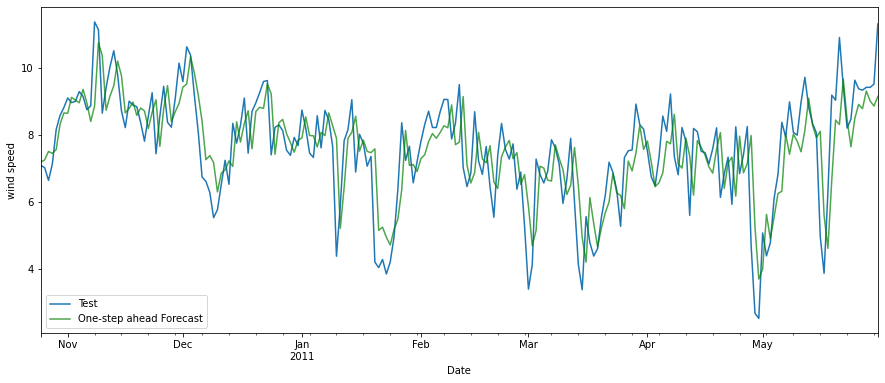

In [31]:
# Observed vs one step ahead forecast graphic
# ax = y['2009-07-01':].plot(label='observed')
ax = y['2010-10-25':].plot(label='Test')
pred.predicted_mean.plot(figsize=(15, 6),ax=ax, label='One-step ahead Forecast', alpha=.7,color="green")

# ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('wind speed')
plt.legend()

# plt.savefig('forecast_sarimax2.eps', format='eps', dpi=1200)
plt.savefig('forecast_sarimax.eps', format='eps', dpi=1200)

plt.show()


In [22]:
# PREDICTED AND OBSERVED WIND SPEED DATA
y_forecasted = pred.predicted_mean # Predicted
y_truth = y['2010-10-25':] # Observed
# y_truth = y['2010-10-21':] # Observed



In [23]:
# STATISTICAL METRICS TO ASSESS THE FORECAST MODEL

# MAE
def mean_absolute_error(true, pred):
    abs_error = np.abs(true - pred)
    sum_abs_error = np.sum(abs_error)
    mae_loss = sum_abs_error / true.size
    return mae_loss

#MAPE
def mean_absolute_percentage_error(true, pred):
    abs_error = (np.abs(true - pred)) / true
    sum_abs_error = np.sum(abs_error)
    mape_loss = (sum_abs_error / true.size) * 100
    return mape_loss

#MSE
def mean_squared_error(true, pred):
    squared_error = np.square(true - pred) 
    sum_squared_error = np.sum(squared_error)
    mse_loss = sum_squared_error / true.size
    return mse_loss

#RMSE
def root_mean_squared_error(true, pred):
    squared_error = np.square(true - pred) 
    sum_squared_error = np.sum(squared_error)
    rmse_loss = np.sqrt(sum_squared_error / true.size)
    return rmse_loss

#RRMSE
def relative_root_mean_squared_error(true, pred):
    num = np.sum(np.square(true - pred))
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss

In [26]:
# CHOOSING RRMSE METRIC AND VERIFY ITS PERFORMANCE
print("MAE: ", mean_absolute_error(y_truth,y_forecasted))
print("MAPE: ", mean_absolute_percentage_error(y_truth,y_forecasted))
print("MSE: ", mean_squared_error(y_truth,y_forecasted))
print("RMSE: ", root_mean_squared_error(y_truth,y_forecasted))
print("RRMSE: ", relative_root_mean_squared_error(y_truth,y_forecasted))


MAE:  0.8321558128662565
MAPE:  12.689824074989097
MSE:  1.1775957743298517
RMSE:  1.085170850294944
RRMSE:  0.14157265934044394
